             timestamp location  traffic_volume  temperature weather  \
0  2023-01-01 00:00:00        D              88        27.43   Clear   
1  2023-01-01 00:15:00        C             204        36.72     Fog   
2  2023-01-01 00:30:00        E             311        16.88    Snow   
3  2023-01-01 00:45:00        D             250        25.95     Fog   
4  2023-01-01 01:00:00        D             258        12.65    Snow   

   is_holiday  incident     event  
0           1         0   Concert  
1           0         0   Concert  
2           0         0    Sports  
3           1         1   Concert  
4           1         0  Festival  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       30000 non-null  object 
 1   location        30000 non-null  object 
 2   traffic_volume  30000 non-null  int64  
 3   temperature  

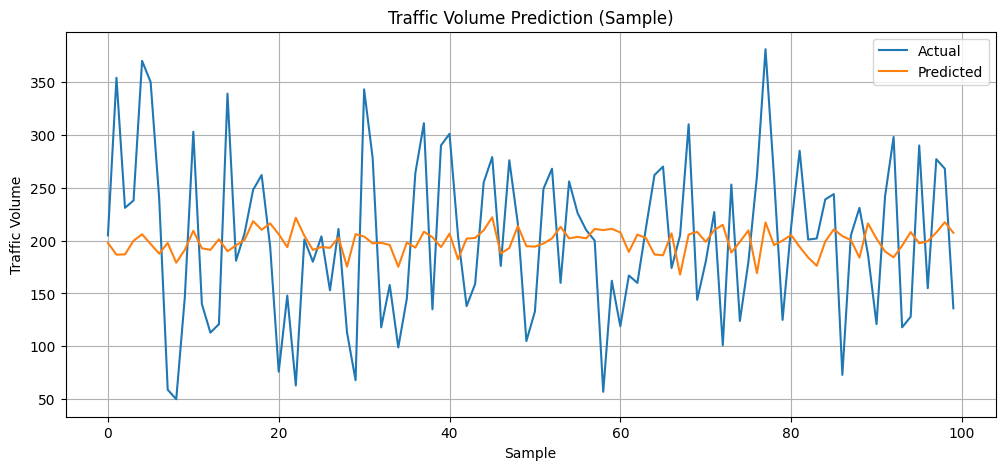

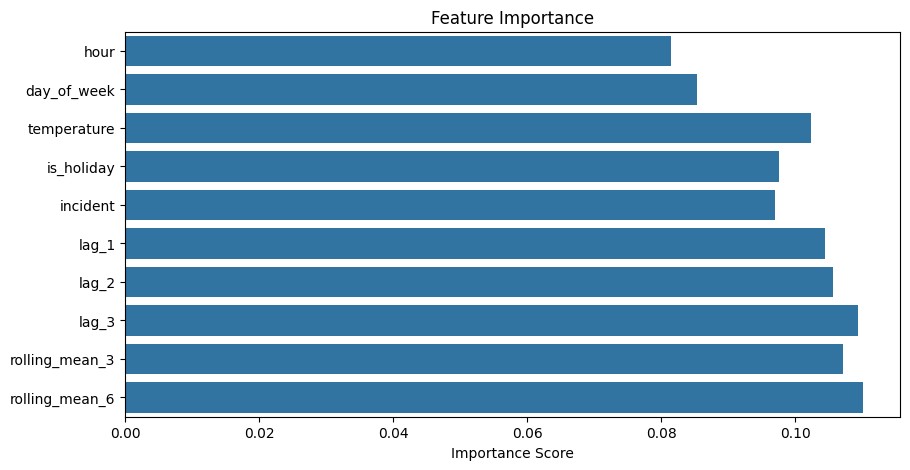

In [33]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("traffic_data.csv")

print(df.head())
print(df.info())

print("Columns in dataset:", df.columns)

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

df['lag_1'] = df['traffic_volume'].shift(1)
df['lag_2'] = df['traffic_volume'].shift(2)
df['lag_3'] = df['traffic_volume'].shift(3)

df['rolling_mean_3'] = df['traffic_volume'].shift(1).rolling(window=3).mean()
df['rolling_mean_6'] = df['traffic_volume'].shift(1).rolling(window=6).mean()

df = df.dropna()

features = ['hour', 'day_of_week', 'temperature', 'is_holiday', 'incident',
            'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'rolling_mean_6']
target = 'traffic_volume'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Traffic Volume Prediction (Sample)')
plt.xlabel('Sample')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid()
plt.show()

importance = model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [39]:

df.columns = df.columns.str.strip()

print("Columns before get_dummies:", df.columns)

cols_to_encode = [col for col in ['weather', 'event'] if col in df.columns]

df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

features = ['hour', 'day_of_week', 'temperature', 'is_holiday', 'incident',
            'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'rolling_mean_6']

dummy_cols = [col for col in df.columns if col.startswith('weather_') or col.startswith('event_')]

features += dummy_cols


Columns before get_dummies: Index(['timestamp', 'location', 'traffic_volume', 'temperature', 'is_holiday',
       'incident', 'hour', 'day_of_week', 'lag_1', 'lag_2', 'lag_3',
       'rolling_mean_3', 'rolling_mean_6', 'weather_Cloudy', 'weather_Fog',
       'weather_Rain', 'weather_Snow', 'event_Festival', 'event_Parade',
       'event_Sports'],
      dtype='object')


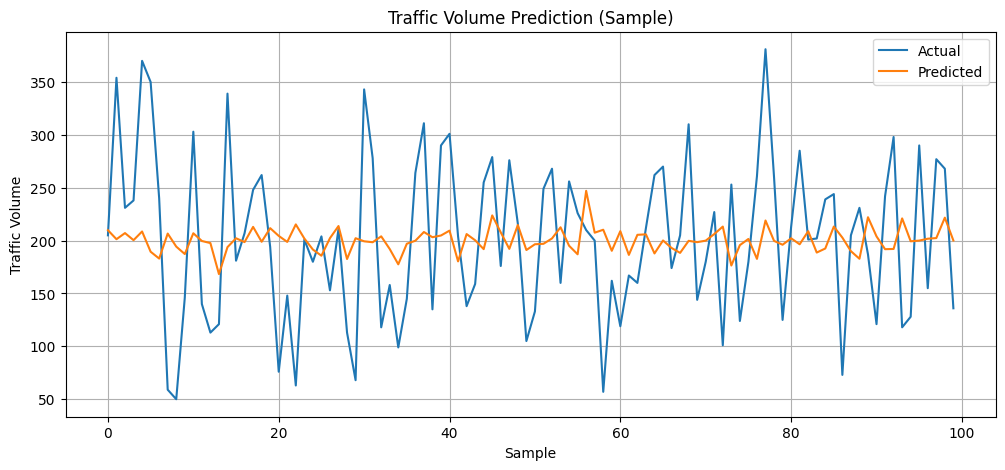

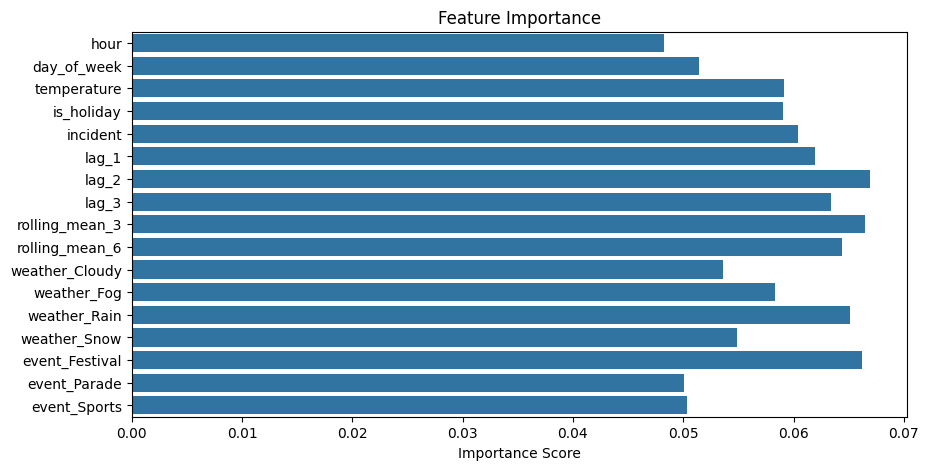

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Actual vs Predicted Traffic Volume (first 100 samples)
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Traffic Volume Prediction (Sample)')
plt.xlabel('Sample')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid()
plt.show()

# Plot Feature Importance
importance = model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


Create/engineer meaningful features.

Handle categorical variables properly.

Prepare training and testing datasets.

Train the model and make predictions.

Calculate evaluation metrics.